# 一元线性回归-通过年龄预测医疗费用

In [24]:
# 导入相关库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [6]:
# 导入数据
data=pd.read_csv("./data/insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


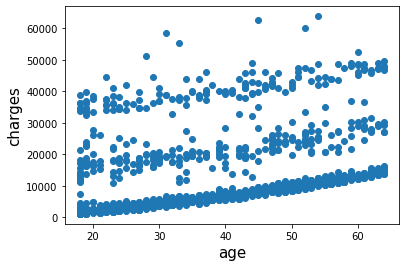

In [13]:
# 数据预处理
data.info()
#观察可知没有缺失数据

#观察有无异常值
plt.figure()
plt.scatter(data["age"],data["charges"])
plt.xlabel("age",fontsize=15)
plt.ylabel("charges",fontsize=15)
plt.show()

Int64Index([], dtype='int64') Int64Index([], dtype='int64') Int64Index([], dtype='int64')


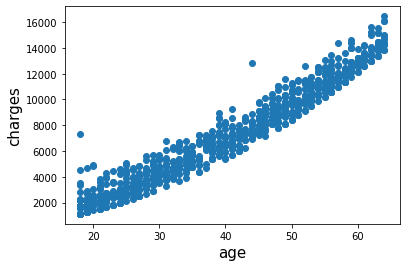

In [80]:
# 由于是构造一元线性模型，故只保留最下方的密集数据
print(data[(data["age"]<40 ) & (data["charges"]>10000)].index,
      data[(data["age"]>40 ) & (data["age"]<50 ) & (data["charges"]>13000)].index,
     data[(data["age"]>50 ) & (data["charges"]>18000)].index)
data=data.drop(data[(data["age"]<40 ) & (data["charges"]>10000)].index)
data=data.drop(data[(data["age"]>=40 ) & (data["age"]<50 ) & (data["charges"]>13000)].index)
data=data.drop(data[(data["age"]>=50 ) & (data["charges"]>18000)].index)

#观察删除后结果
plt.figure()
plt.scatter(data["age"],data["charges"])
plt.xlabel("age",fontsize=15)
plt.ylabel("charges",fontsize=15)
plt.show()

In [88]:
# 分离自变量和因变量
X=data["age"]
Y=data["charges"]
X.head()
Y.head()
X=X.values.reshape(-1,1)
Y=Y.values.reshape(-1,1)
print(X.shape,Y.shape)

(967, 1) (967, 1)


In [85]:
# 一元线性关系应该不用特征缩放吧 min-max缩放也是线性缩放
# 特征缩放 
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [89]:
# 拆分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (773, 1)
x_test (194, 1)
y_train (773, 1)
y_test (194, 1)


## sklearn.linear_model.LinearRegression 方法

`lr = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`

[api详解](https://zhuanlan.zhihu.com/p/71633922)

参数详解
> fit_intercept：默认True，是否计算模型的截距，为False时，则[数据中心化处理](https://www.zhihu.com/question/37069477)
>
> normalize：默认False，是否中心化，**这个参数被标记为弃用，如果需要中心化需要用使用sklearn.preprocessing.StandardScaler()** 
>
> copy_X：默认True，否则X会被改写
>
> n_jobs：默认为1，表示使用CPU的个数。当-1时，代表使用全部CPU


In [90]:
# 构建线性模型 -默认情况，即fit_intercept=True, normalize=False
reg=LinearRegression()
reg.fit(x_train,y_train)
# 对测试集生成预测结果
y_pre=reg.predict(x_test)
# 进行r2评分
r2_score(y_test,y_pre)

0.9519973444722932

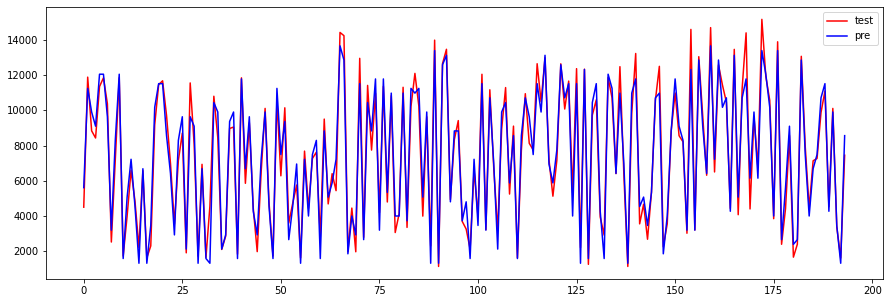

In [78]:
# 可视化测试集预测误差
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)),y_test,'r',label="test")
plt.plot(range(len(y_test)),y_pre,'b',label="pre")
plt.legend()
plt.show()

In [92]:
# 构建线性模型 fit_intercept=False, normalize=False
reg=LinearRegression(fit_intercept=False)
reg.fit(x_train,y_train)
# 对测试集生成预测结果
y_pre=reg.predict(x_test)
# 进行r2评分
r2_score(y_test,y_pre)

0.8527874694695656

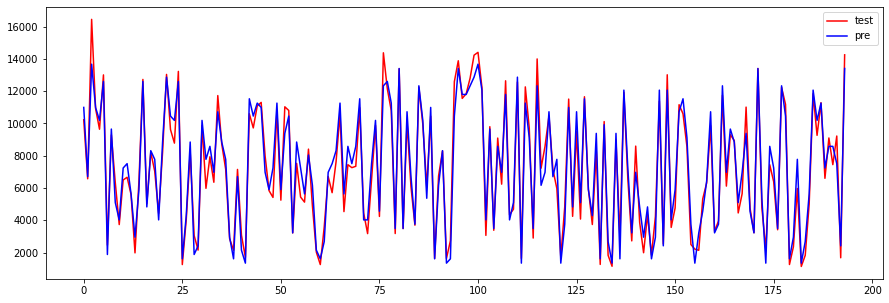

In [98]:
# 可视化测试集预测误差
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)),y_test,'r',label="test")
plt.plot(range(len(y_test)),y_pre,'b',label="pre")
plt.legend()
plt.show()